

# **EC1B1 Coursework - Germany**

## by Oliver Gregory, Adrien Joly, Devtar Chawla and Ben Cowling

March 2023




*Section 4 - Downloading data (4.1) and data cleaning (4.2)*

*Note: to run this code on Google Colab/Jupyter, the user should have access to the following excel files:
- International_Financial_Statistics_Germany.xlsx (26 kb)
- International_Financial_Statistics_US.xlsx (18 kb)

For google colab:
- click the Files icon to open the 'Files explorer' pane
- click the upload icon and select the excel files above from the 'File upload' dialog window
- Once the upload is complete, the code should run. 

For Jupyter:
- replace the file path shown below (/content/International_Financial_Statistics_Germany.xlsx) by the relative file path (International_Financial_Statistics_Germany.xlsx) or your own computer's own file path. 
- Do the same procedure for the US dataset. The relative file path is International_Financial_Statistics_US.xlsx
- Run the code normally


In [1]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#import the raw datasets from excel into python, setting the header as the 2nd row (First row has IFS header)
germany_df = pd.read_excel(r'/content/International_Financial_Statistics_Germany.xlsx',header=1)

#rename the columns 
germany_df = germany_df.rename(columns={'Unnamed: 0':'Time (Months)','Economic Activity, Industrial Production, Index':'German Industrial Production','Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'German exchange rate','International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':'German Reserves','Prices, Consumer Price Index, All items, Index':'German inflation index','Prices, Consumer Price Index, All items, Percentage change, Corresponding period previous year, Percent':'German Inflation, YTD % change'})

#drop the row with "Germany" headers
germany_df = germany_df.drop([0], axis=0)

#obtain a snippet of the dataframe
germany_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/International_Financial_Statistics_Germany.xlsx'

In [ ]:
#import the raw datasets from excel into python
us_df = pd.read_excel(r'/content/International_Financial_Statistics_US.xlsx', header=1)

#rename columns
us_df = us_df.rename(columns={'Unnamed: 0':'Time (Months)','United States':'US reserves','United States.1':'US inflation index','United States.2':'US inflation YTD % change'})

#drop the row with "US" headers
us_df = us_df.drop([0], axis=0)

#show a snippet of the US_df dataframe
us_df.head()

,Time (Months),US reserves,US inflation index,US inflation YTD % change
1,Jan 1960,21478.1,13.436946,1.034483
2,Feb 1960,21395.7,13.482806,1.730104
3,Mar 1960,21344.7,13.482806,1.730104
4,Apr 1960,21278,13.528666,1.724138
5,May 1960,21234.3,13.528666,1.724138


*4.2/Question 5.2(1) - Finding the number of observations in the dataset*

In [ ]:
#check the dimensions of the Germany dataset
germany_df.shape

(372, 6)

In [ ]:
#check the dimension of the US dataset
us_df.shape

(372, 4)

*4.2 - Merging the dataframes and constructing variables*


In [ ]:
#merge the two dataframes
merged_df = pd.merge(germany_df, us_df, on='Time (Months)')

#Change the start of the index from 0 to 1 
merged_df.index = merged_df.index + 1

#drop % change inflation rates - these are calculated through price index
merged_df = merged_df.drop(merged_df.columns[[5,8]],axis=1)

merged_df.head()

,Time (Months),German Industrial Production,German exchange rate,German Reserves,German inflation index,US reserves,US inflation index
1,Jan 1960,31.214706,4.2,4724.155785,24.61694,21478.1,13.436946
2,Feb 1960,31.062322,4.2,4806.36283,24.477064,21395.7,13.482806
3,Mar 1960,32.225254,4.2,4966.456016,24.477064,21344.7,13.482806
4,Apr 1960,34.310512,4.2,5236.120624,24.61694,21278,13.528666
5,May 1960,33.749096,4.2,5417.091847,24.686867,21234.3,13.528666


In [ ]:
#Germany variable 1: the log exchange rate
merged_df['log exchange rate'] = merged_df['German exchange rate'].apply(lambda x: math.log(x)) 

#Germany variable 2: The difference in the log exchange rate versus the previous month.
merged_df['Diff. in log exchange rate'] = (merged_df['log exchange rate'] - merged_df['log exchange rate'].shift(1))*100

#Germany variable 3: The monthly inflation rate
merged_df['German monthly inflation rate'] = (100*(merged_df['German inflation index'] - merged_df['German inflation index'].shift(1))) / merged_df['German inflation index'].shift(1)

#Germany variable 4: the log industrial production
merged_df['log industrial production'] = merged_df['German Industrial Production'].apply(lambda x: math.log(x)) 

#Germany variable 5: Monthly growth in industrial production
merged_df['monthly growth in industrial production'] = (100 * (merged_df['German Industrial Production'] - merged_df['German Industrial Production'].shift(1))) / merged_df['German Industrial Production'].shift(1)

#Germany variable 6 : Growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 
merged_df['German yearly growth in industrial production'] = (100 * (merged_df['German Industrial Production'] - merged_df['German Industrial Production'].shift(12))) / merged_df['German Industrial Production'].shift(12)

#Germany variable 7 : An index of the value of international reserves (value of reserves at January 1960 = 100)
merged_df['German indexed reserves'] = (merged_df['German Reserves'] / merged_df.loc[1,'German Reserves']) * 100

#US variable 1: The monthly inflation rate
merged_df['US monthly inflation rate'] = (100*(merged_df['US inflation index'] - merged_df['US inflation index'].shift(1))) / merged_df['US inflation index'].shift(1)

#US variable 2: An index of the value of international reserves (value of reserves at January 1960 = 100)
merged_df['US indexed reserves'] = (merged_df['US reserves'] / merged_df.loc[1,'US reserves']) * 100

merged_df.head()

,Time (Months),German Industrial Production,German exchange rate,German Reserves,German inflation index,US reserves,US inflation index,log exchange rate,Diff. in log exchange rate,German monthly inflation rate,log industrial production,monthly growth in industrial production,German yearly growth in industrial production,German indexed reserves,US monthly inflation rate,US indexed reserves
1,Jan 1960,31.214706,4.2,4724.155785,24.61694,21478.1,13.436946,1.435085,NaN,NaN,3.440889,NaN,NaN,100.0,NaN,100.0
2,Feb 1960,31.062322,4.2,4806.36283,24.477064,21395.7,13.482806,1.435085,0.0,-0.568208,3.435996,-0.488181,NaN,101.740143,0.341297,99.616353
3,Mar 1960,32.225254,4.2,4966.456016,24.477064,21344.7,13.482806,1.435085,0.0,0.0,3.472750,3.743868,NaN,105.128964,0.0,99.378902
4,Apr 1960,34.310512,4.2,5236.120624,24.61694,21278,13.528666,1.435085,0.0,0.571455,3.535452,6.470881,NaN,110.837171,0.340136,99.068353
5,May 1960,33.749096,4.2,5417.091847,24.686867,21234.3,13.528666,1.435085,0.0,0.28406,3.518954,-1.636279,NaN,114.667934,0.0,98.86489


*4.2/Question 5.2.4-5 - Identifying outliers/interpolating missing data*

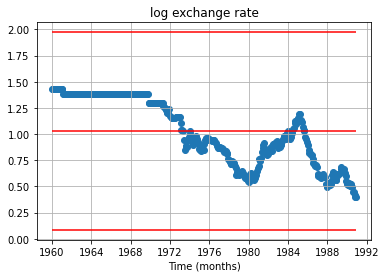

1.028847575921988
0.314577387076238


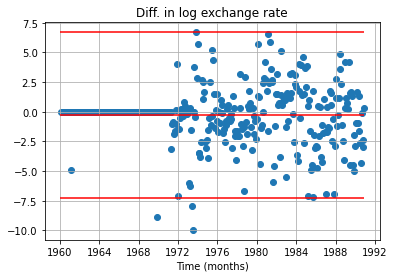

-0.2789668529028729
2.327755035366738


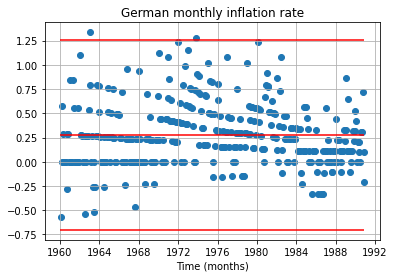

0.2755190715874406
0.3264948653295436


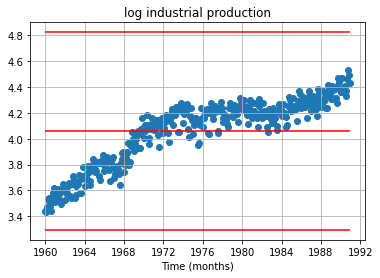

4.059243157376505
0.25468854869128604


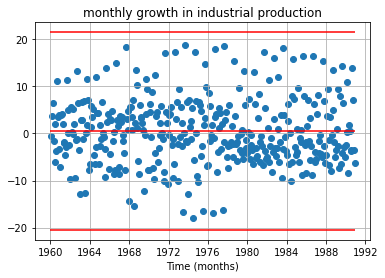

0.5083510570683704
6.999278660180931


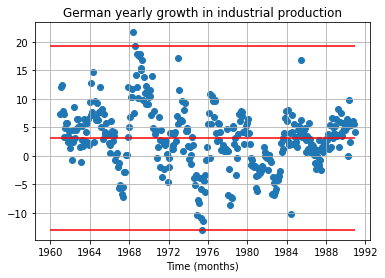

3.1850638561238966
5.37317658874061


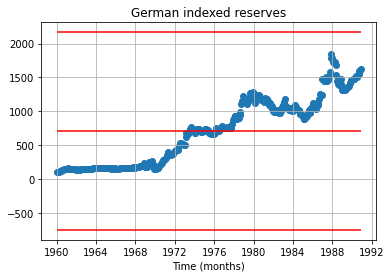

707.9677244857543
486.10384380739265


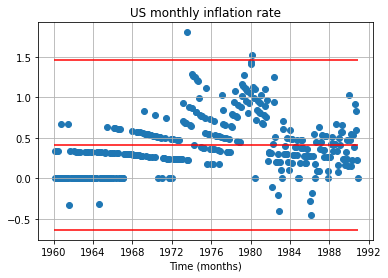

0.4108130252096339
0.3488642942181047


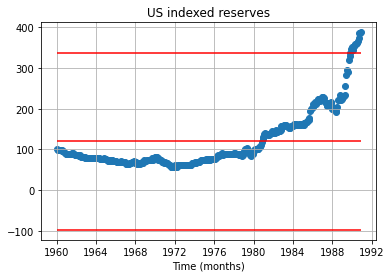

119.84792730015879
72.43872059744643


In [ ]:
#make scatter plots of the variables to identify outliers/trends in outliers

#change the format using datetime module
merged_df['Time (Months)'] = pd.to_datetime(merged_df['Time (Months)'])
merged_df.set_index('Time (Months)')

#Define variable x as the Time column of merged_df, as this will make it easier to plot multiple time series graphs
x = merged_df['Time (Months)']

#loop through all constructed variables (merged_df.columns[7:]) to create scatter plots showing mean and standard dev lines
#Define outliers as +/- 3 standard deviations from the mean (i.e. z >= 3)

for i in merged_df[merged_df.columns[7:]]:
  plt.figure()
  plt.scatter(x,merged_df[i])
  plt.xlabel('Time (months)')
  plt.grid()
  mean = np.mean(merged_df[i])
  st_dev = np.std(merged_df[i])
  mean_line = plt.hlines(y=mean, xmin=pd.to_datetime('1960-01'), xmax=pd.to_datetime('1990-12'), colors='red', label='Mean')
  mean_line = plt.hlines(y=[mean+(3*st_dev),mean-(3*st_dev)], xmin=pd.to_datetime('1960-01'), xmax=pd.to_datetime('1990-12'), colors='red', label='Std Dev')

  plt.title(i)
  plt.show()
  print(mean)
  print(st_dev)




*4.2/Question 5.3.1 1-2 - Constructing time series graphs of nominal/real exchange rate growth*

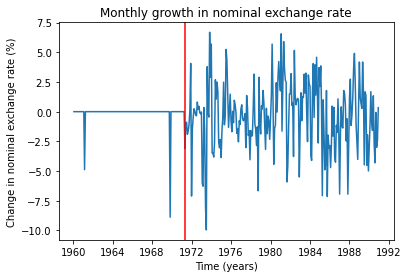

In [ ]:
#Monthly growth in nominal exchange rate

#change the format using datetime module
merged_df['Time (Months)'] = pd.to_datetime(merged_df['Time (Months)'])
merged_df.set_index('Time (Months)')

#define plot variables
x = merged_df['Time (Months)']
y = merged_df['Diff. in log exchange rate']

plt.plot(x,y)

#insert line when the exchange rate regime changed
plt.axvline(x=pd.to_datetime('1971-05'), color='red')

#add labels to the axes and a title
plt.xlabel('Time (years)')
plt.ylabel('Change in nominal exchange rate (%)')
plt.title('Monthly growth in nominal exchange rate')

plt.show()

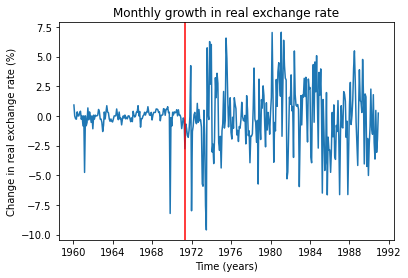

In [ ]:
#Using the formula for Real exchange rate: Real Exchange rate = EP*/P, where E = nominal exchange rate, P* = US Price Level, P = German Price level
merged_df['RER'] = (merged_df['German exchange rate']*merged_df['US inflation index'])/merged_df['German inflation index']

#Use .shift function to calculate a percentage change in RER by month
merged_df['Change in RER'] = ((merged_df['RER'])/merged_df['RER'].shift(1)- 1)*100

#Plot a time series of monthly growth in real exchange rate
plt.plot(x,merged_df['Change in RER'])

#Show when Germany first left the Bretton Woods system (May 1971)
plt.axvline(x=pd.to_datetime('1971-05'), color='red')

#Add labels and title to the graph
plt.xlabel('Time (years)')
plt.ylabel('Change in real exchange rate (%)')
plt.title('Monthly growth in real exchange rate')

#Display graph as output
plt.show()

*Section 4.3: Final product*

In [ ]:
#reset Jupyter default option to print the full dataframe
pd.set_option('display.max_rows', 400)
pd.get_option("display.max_rows")

pd.options.display.max_rows

#print full merged dataset with constructed variables 
merged_df

,Time (Months),German Industrial Production,German exchange rate,German Reserves,German inflation index,US reserves,US inflation index,log exchange rate,Diff. in log exchange rate,German monthly inflation rate,log industrial production,monthly growth in industrial production,German yearly growth in industrial production,German indexed reserves,US monthly inflation rate,US indexed reserves,RER,Change in RER
1,1960-01-01,31.214706,4.2,4724.155785,24.61694,21478.1,13.436946,1.435085,NaN,NaN,3.440889,NaN,NaN,100.0,NaN,100.0,2.292534,NaN
2,1960-02-01,31.062322,4.2,4806.36283,24.477064,21395.7,13.482806,1.435085,0.000000e+00,-0.568208,3.435996,-0.488181,NaN,101.740143,0.341297,99.616353,2.313504,0.914702
3,1960-03-01,32.225254,4.2,4966.456016,24.477064,21344.7,13.482806,1.435085,0.000000e+00,0.0,3.472750,3.743868,NaN,105.128964,0.0,99.378902,2.313504,0.0
4,1960-04-01,34.310512,4.2,5236.120624,24.61694,21278,13.528666,1.435085,0.000000e+00,0.571455,3.535452,6.470881,NaN,110.837171,0.340136,99.068353,2.308183,-0.230004
5,1960-05-01,33.749096,4.2,5417.091847,24.686867,21234.3,13.528666,1.435085,0.000000e+00,0.28406,3.518954,-1.636279,NaN,114.667934,0.0,98.86489,2.301645,-0.283256
6,1960-06-01,34.422795,4.2,5843.766907,24.686867,21169.8,13.574526,1.435085,0.000000e+00,0.0,3.538719,1.996198,NaN,123.699708,0.338983,98.564584,2.309447,0.338983
7,1960-07-01,32.369618,4.2,6124.728538,24.686867,20999.4,13.574526,1.435085,0.000000e+00,0.0,3.477220,-5.964585,NaN,129.647048,0.0,97.771218,2.309447,0.0
8,1960-08-01,31.174605,4.2,6358.680576,24.686867,20803.4,13.574526,1.435085,0.000000e+00,0.0,3.439604,-3.691774,NaN,134.599299,0.0,96.858661,2.309447,0.0
9,1960-09-01,34.679442,4.2,6643.272902,24.61694,20430,13.574526,1.435085,0.000000e+00,-0.283256,3.546147,11.242604,NaN,140.623493,0.0,95.120146,2.316007,0.28406
10,1960-10-01,35.914556,4.2,6878.948071,24.686867,20068.2,13.666246,1.435085,0.000000e+00,0.28406,3.581143,3.561517,NaN,145.612219,0.675676,93.435639,2.325051,0.390506


*Questions 5.3.1 4-5 - International reserve graphs*



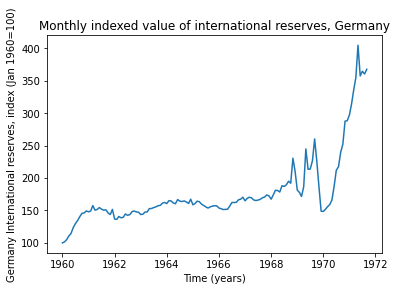

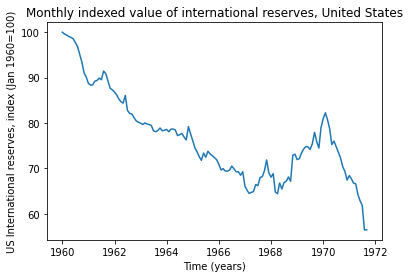

In [ ]:
#Monthly indexed value of international reserves - Germany 

#define x_1973 as a subset of x (merged_df['Time (months)'], up to the exit of the US from Bretton Woods (August 1973)

x_1973 = x.iloc[:141]

#define German_reserves as a subset of German indexed reserves column (merged_df['German indexed reserves']), up to the exit of the US from Bretton Woods (August 1973)

German_reserves = merged_df['German indexed reserves'].iloc[:141]

#Plot a time series graph of the two variables

plt.plot(x_1973, German_reserves)

#add x and y axis labels, add title 
plt.xlabel('Time (years)')
plt.ylabel('Germany International reserves, index (Jan 1960=100)')
plt.title('Monthly indexed value of international reserves, Germany')

#display time series graph
plt.show()

#define US_reserves as a subset of US indexed reserves column (merged_df['US indexed reserves']), up to the exit of the US from Bretton Woods (August 1973)

US_reserves = merged_df['US indexed reserves'].iloc[:141]

#Plot a time series graph of the two variables

plt.plot(x_1973, US_reserves)

#add x and y axis labels, add title 
plt.xlabel('Time (years)')
plt.ylabel('US International reserves, index (Jan 1960=100)')
plt.title('Monthly indexed value of international reserves, United States')

#display time series graph
plt.show()


*Question 5.3.2 - Inflation and industrial production graphs*

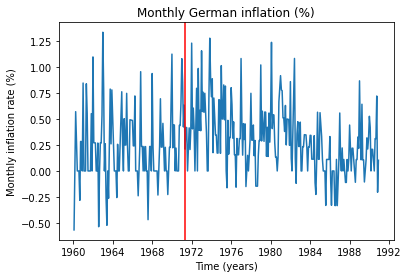

In [ ]:
#Monthly inflation in Germany
y = merged_df['German monthly inflation rate']

plt.plot(x,y)

plt.axvline(x=pd.to_datetime('1971-05'), color='red')

plt.xlabel('Time (years)')
plt.ylabel('Monthly inflation rate (%)')
plt.title('Monthly German inflation (%)')

plt.show()

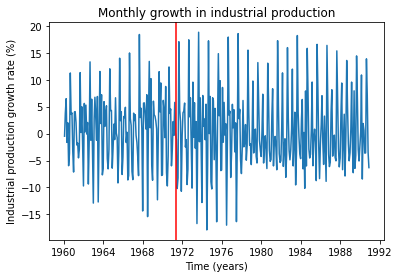

In [ ]:
#Monthly growth in industrial production
y = merged_df['monthly growth in industrial production']

plt.plot(x,y)

plt.axvline(x=pd.to_datetime('1971-05'), color='red')

plt.xlabel('Time (years)')
plt.ylabel('Industrial production growth rate (%)')
plt.title('Monthly growth in industrial production')

plt.show()

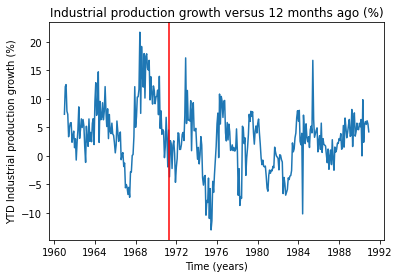

In [ ]:
#Growth in industrial production versus 12 months ago
y = merged_df['German yearly growth in industrial production']

plt.plot(x,y)

plt.axvline(x=pd.to_datetime('1971-05'), color='red')

plt.xlabel('Time (years)')
plt.ylabel('YTD Industrial production growth (%)')
plt.title('Industrial production growth versus 12 months ago (%)')

plt.show()

*Question 5.3.3 - Comparison statistics*

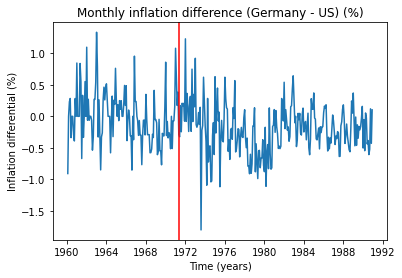

In [ ]:
#Comparison statistics

#Calculate inflation differentials and plot time series graph

merged_df['Inflation differential'] = merged_df['German monthly inflation rate'] - merged_df['US monthly inflation rate']

plt.plot(x,merged_df['Inflation differential'])

plt.axvline(x=pd.to_datetime('1971-05'), color='red')

plt.xlabel('Time (years)')
plt.ylabel('Inflation differential (%)')
plt.title('Monthly inflation difference (Germany - US) (%)')

plt.show()


*Note: We interpret the date Germany left Bretton Woods as May 1971, when the DEM-USD exchange rate was temporarily allowed to float (lasting until December 1971). As such, our standard deviation table may give different results to setting the exit date as March 1973, the official exit date.*

In [ ]:
#Create a new dataframe, sliced_df, to isolate the variables needed for table of standard deviations

sliced_df = merged_df.loc[:,['Diff. in log exchange rate','Change in RER','German monthly inflation rate','Inflation differential','German yearly growth in industrial production']]

#Select the first 127 rows, corresponding to the period 10 months immediately before Germany left Bretton Woods (before July 1970)
#For these, .std() will calculate the standard deviation of each colummn

BBW_vol = sliced_df.iloc[:128].std()

#Select the rows from the 147th row, corresponding to the period 10 months after Germany left Bretton Woods (March 1972 onwards)

ABW_vol = sliced_df.iloc[147:].std()

#Find the ratio of the standard deviation of each variable before and after Bretton Woods

vol_ratio = ABW_vol/BBW_vol

#Combine the three variables BBW_vol, ABW_vol, vol_ratio into one dataframe

volatility_df = pd.concat([BBW_vol,ABW_vol,vol_ratio],axis=1)

#name the columns of volatility_df

volatility_df.columns = ['Standard deviation before Bretton Woods', 'Standard deviation after Bretton Woods','Volatility ratio']

#rename the row index of volatility_df 

volatility_df = volatility_df.rename(index={'Diff. in log exchange rate': 'Nominal exchange rate monthly growth (%)', 
                                            'Change in RER': 'Real exchange rate monthly growth (%)', 
                                            'German monthly inflation rate':'German monthly inflation rate (%)',
                                            'Inflation differential':'Inflation differential (Germany-US) (%)',
                                            'German yearly growth in industrial production':'German yearly growth in industrial production (%)'})

#print volatility_df

volatility_df


,Standard deviation before Bretton Woods,Standard deviation after Bretton Woods,Volatility ratio
Nominal exchange rate monthly growth (%),0.896303,2.852880,3.182940
Real exchange rate monthly growth (%),0.935950,2.893618,3.091638
German monthly inflation rate (%),0.335983,0.312704,0.930714
Inflation differential (Germany-US) (%),0.409974,0.378848,0.924076
German yearly growth in industrial production (%),5.677503,4.757277,0.837917


*Section 5.3.4 Question 2 - Showing changes in levels of the DEM/USD nominal exchange rate*

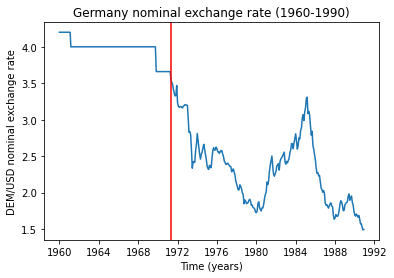

,Mean ER before Bretton Woods,Mean ER after Bretton Woods,Ratio
DEM/USD exchange rate,3.995313,2.28588,0.572141


In [ ]:
#plotting DEM-USD nominal exchange rate over time 

#define nom_ER as the nominal exchange rate column of merged_df
nom_ER = merged_df['German exchange rate']

#Plot a time series graph of nominal exchange rate
plt.plot(x,nom_ER)

#add verticl line to show Germany's exit date from Bretton Woods
plt.axvline(x=pd.to_datetime('1971-05'), color='red')

#Add labels and title
plt.xlabel('Time (years)')
plt.ylabel('DEM/USD nominal exchange rate')
plt.title('Germany nominal exchange rate (1960-1990)')

#Display time series plot
plt.show()

#Let BBW_mean denote the mean value of the German exchange rate column of merged_df, before July 1970 
BBW_mean = nom_ER.iloc[:128].mean()

#Let ABW_mean denote the mean value of the German exchange rate column of merged_df, after March 1972
ABW_mean = nom_ER.iloc[147:].mean()

#Let 'ratio' be the ratio of the means before and afte the end of Bretton Woods
ratio = ABW_mean / BBW_mean

#Create a table of the variables above

mean_df = pd.DataFrame({'Mean ER before Bretton Woods': BBW_mean,
                        'Mean ER after Bretton Woods': ABW_mean,
                        'Ratio': ratio}, index=['DEM/USD exchange rate'])

#print the results table
mean_df

